<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import os
import sys
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as stats
from arch import arch_model
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
sns.set_style('darkgrid')
%matplotlib inline
p = print

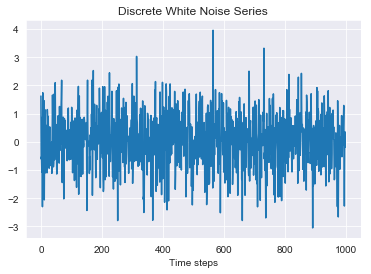

In [2]:
np.random.seed(1)
# Discrete White Noise model
mean, std_dev, n_samples = 0.0, 1.0, 1000
WN = np.random.normal(loc=mean, scale=std_dev, size=n_samples)
plt.plot(WN)
plt.title('Discrete White Noise Series')
plt.xlabel('Time steps');

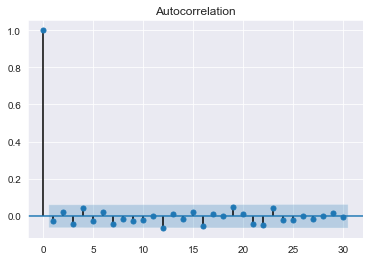

In [3]:
smt.graphics.plot_acf(WN, lags=30);

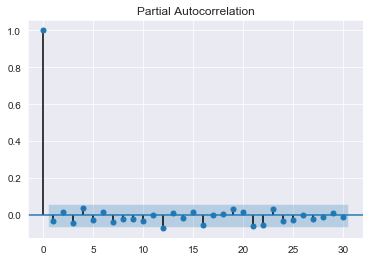

In [4]:
smt.graphics.plot_pacf(WN, lags=30);

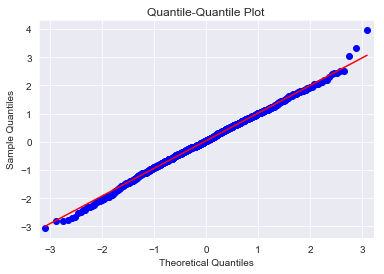

In [5]:
sm.qqplot(WN, line='s',);
plt.title('Quantile-Quantile Plot');

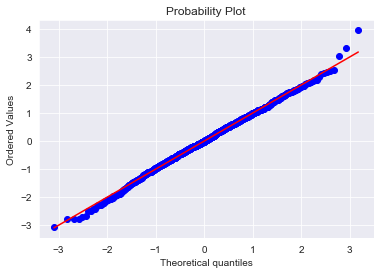

In [6]:
stats.probplot(WN, sparams=(WN.mean(), WN.std()), plot=plt);

In [7]:
p(f'Discrete White Noise: \nMean: {WN.mean()}\nVariance: {WN.var()} \nStandard deviation: {WN.std()}')

Discrete White Noise: 
Mean: 0.03881247615960185
Variance: 0.9623691107920885 
Standard deviation: 0.9810041339322116


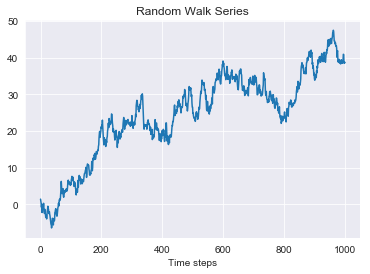

In [8]:
np.random.seed(1)
n_samples = 1000
# Random Walk
x = w = np.random.normal(loc=mean,scale=std_dev,size=n_samples)
for t in range(n_samples):
    x[t] = x[t-1] + w[t]
plt.plot(x)
plt.title('Random Walk Series')
plt.xlabel('Time steps')
plt.show()

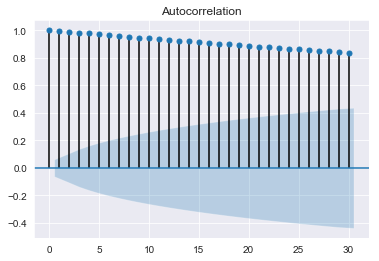

In [9]:
smt.graphics.plot_acf(x, lags=30);

Clearly linear/serial dependence

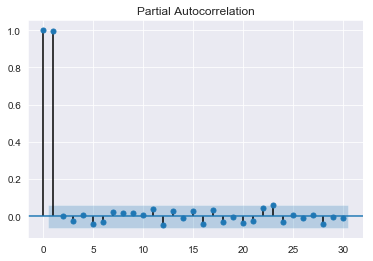

In [10]:
smt.graphics.plot_pacf(x, lags=30);

Lag 1 is the source of serial dependence of the next observation.

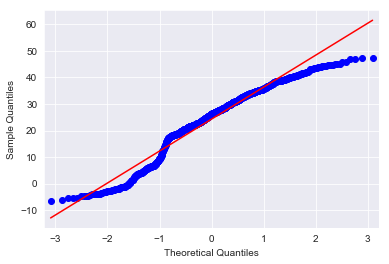

In [11]:
sm.qqplot(x, line='s')
plt.show()

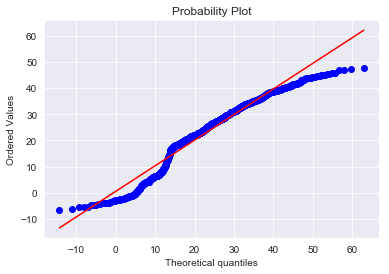

In [12]:
stats.probplot(x, sparams=(x.mean(),x.std()), plot=plt)
plt.show()

In [13]:
p(f'Random Walk: \nMean: {x.mean()}\nVariance: {x.var()} \nStandard deviation: {x.std()}')

Random Walk: 
Mean: 24.321592732215912
Variance: 145.31319358707285 
Standard deviation: 12.05459221985849


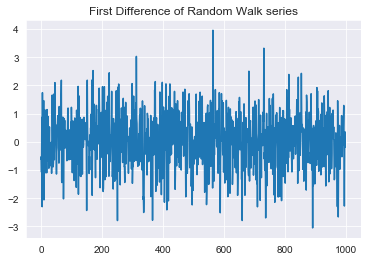

In [14]:
plt.title('First Difference of Random Walk series')
plt.plot(np.diff(x));

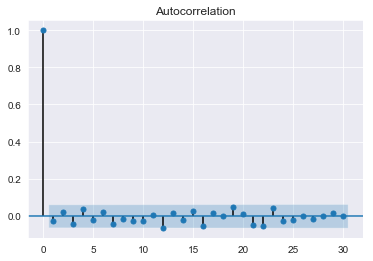

In [15]:
smt.graphics.plot_acf(np.diff(x),lags=30);

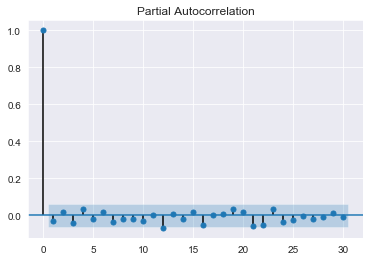

In [16]:
smt.graphics.plot_pacf(np.diff(x),lags=30);

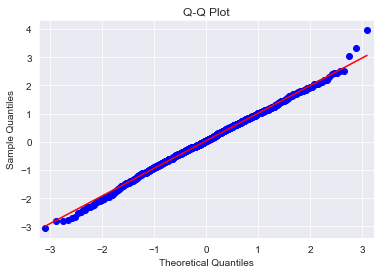

In [17]:
sm.qqplot(np.diff(x),line='s')
plt.title('Q-Q Plot');

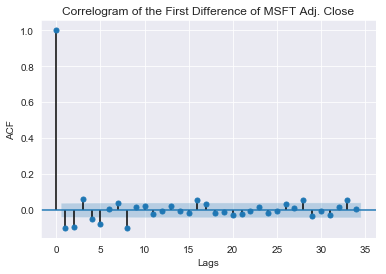

In [18]:
ticker = 'MSFT'
msft = web.DataReader(ticker,'yahoo','01/01/2010','10/18/2019')['Adj Close']
smt.graphics.plot_acf(np.diff(msft));
plt.title(f'Correlogram of the First Difference of {ticker} Adj. Close')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

Peaks indicate shorter and longer-lag process

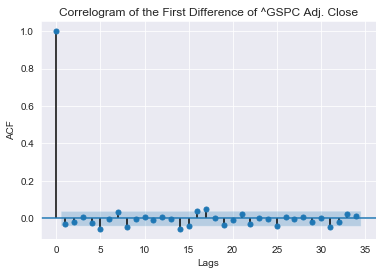

In [19]:
ticker = '^GSPC'
msft = web.DataReader(ticker,'yahoo','01/01/2010','10/18/2019')['Adj Close']
smt.graphics.plot_acf(np.diff(msft));
plt.title(f'Correlogram of the First Difference of {ticker} Adj. Close')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()